In [1]:
%matplotlib inline
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import random
from PIL import Image
import torch
from torch.autograd import Variable
import PIL.ImageOps    
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from model import SiameseNetworkDataset, SiameseNetwork, ContrastiveLoss

In [2]:
DEFAULT_IMAGES_DIR = "scraper/images/training"
DEFAULT_BATCH_SIZE = 64
DEFAULT_NO_EPOCHS = 10
DEFAULT_MODEL_PATH = "model.h5"

In [3]:
def imshow(img,text=None,should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()    

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()

In [4]:
class Config:
    def __init__(self, images_dir, batch_size, epochs, *args, **kwargs):
        self.images_dir = images_dir
        self.train_batch_size = batch_size
        self.train_number_epochs = epochs
        
config = Config(DEFAULT_IMAGES_DIR, DEFAULT_BATCH_SIZE, DEFAULT_NO_EPOCHS)

In [5]:
net = torch.load(DEFAULT_MODEL_PATH)

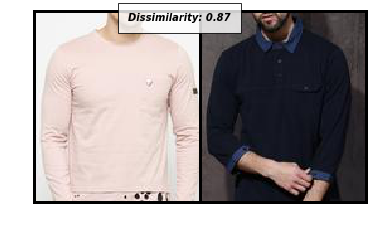

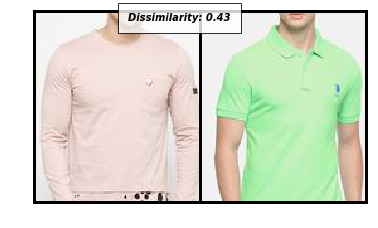

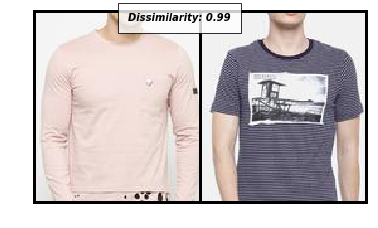

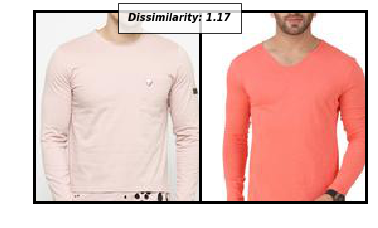

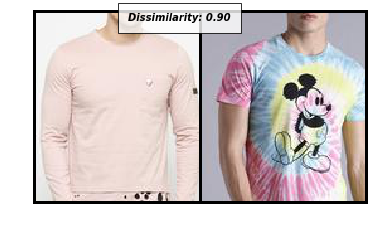

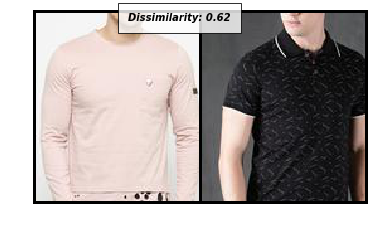

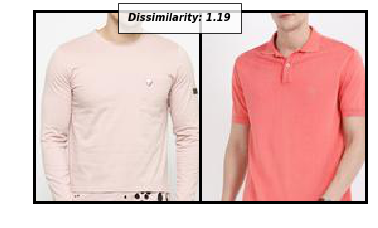

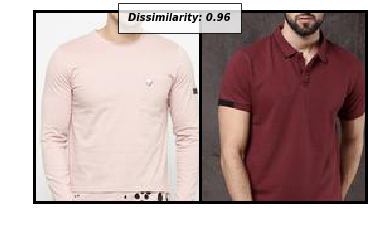

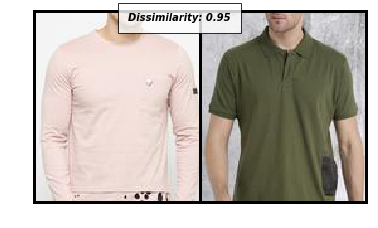

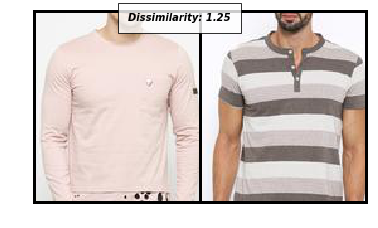

In [9]:
folder_dataset_test = datasets.ImageFolder(root=config.images_dir)
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset_test,
                                        transform=transforms.Compose([transforms.ToTensor()])
                                       ,should_invert=False)

test_dataloader = DataLoader(siamese_dataset,num_workers=0,batch_size=1,shuffle=False)
dataiter = iter(test_dataloader)

x0,_,_ = next(dataiter)

for i in range(10):
    _,x1,label2 = next(dataiter)
    concatenated = torch.cat((x0,x1),0)
    
    output1,output2 = net(Variable(x0).cuda(),Variable(x1).cuda())
    euclidean_distance = F.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.2f}'.format(euclidean_distance.item()))